In [38]:
import pandas as pd
import numpy as np
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn_crfsuite import CRF, scorers, metrics
#from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report, make_scorer
#from sklearn.grid_search import RandomizedSearchCV
import scipy.stats
#import eli5

In [ ]:
import sys
print(sys.path)
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

In [44]:
data = pd.read_csv("/Users/kiwi/Downloads/Data Scientist/Edureka_Projects/GMB_dataset.txt", sep="\t", header=None, encoding="latin1")
data

,0,1,2,3,4
0,NaN,Sentence #,Word,POS,Tag
1,0.0,1.0,Thousands,NNS,O
2,1.0,1.0,of,IN,O
3,2.0,1.0,demonstrators,NNS,O
4,3.0,1.0,have,VBP,O
...,...,...,...,...,...
66157,66156.0,2999.0,be,VB,O
66158,66157.0,2999.0,announced,VBN,O
66159,66158.0,2999.0,within,IN,B-tim
66160,66159.0,2999.0,days,NNS,O


In [9]:
data.columns = data.iloc[0]
data = data[1:]
data.columns = ['Index','Sentence #','Word','POS','Tag']
data = data.reset_index(drop=True)
data.head()

,Index,Sentence #,Word,POS,Tag
0,0.0,1.0,Thousands,NNS,O
1,1.0,1.0,of,IN,O
2,2.0,1.0,demonstrators,NNS,O
3,3.0,1.0,have,VBP,O
4,4.0,1.0,marched,VBN,O


In [10]:
# A class to retrieve the sentences from the dataset
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [11]:
getter = getsentence(data)
sentences = getter.sentences
#This is how a sentence will look like. 
print(sentences[0])

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [12]:
words = list(set(data["Word"].values))
n_words = len(words)
print(n_words)

8766


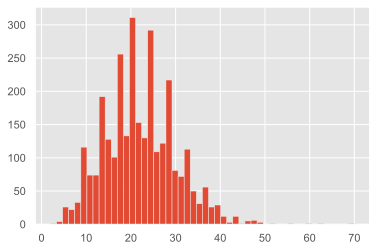

In [13]:
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [14]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 70


In [15]:
data.loc[data['Tag'] == 'B-org', 'Word'].head()

97             Labor
154    International
215             IAEA
234         European
248             U.N.
Name: Word, dtype: object

In [16]:
data.loc[data['Tag'] == 'I-org', 'Word'].head()

98      Party
155    Atomic
156    Energy
157    Agency
235     Union
Name: Word, dtype: object

In [17]:
data.loc[data['Tag'] == 'B-per', 'Word'].head()

42          Bush
270    President
331       Thomas
443    President
965      Prophet
Name: Word, dtype: object

In [18]:
data.loc[data['Tag'] == 'I-per', 'Word'].head()

271        Mahmoud
272    Ahmadinejad
332        Horbach
444      Abdullahi
445          Yusuf
Name: Word, dtype: object

In [20]:
data.loc[data['Tag'] == 'B-geo', 'Word'].head()

6        London
12         Iraq
65         Hyde
94      Britain
106    Brighton
Name: Word, dtype: object

In [21]:
data.loc[data['Tag'] == 'I-geo', 'Word'].head()

66      Park
347    State
350    State
381    Delta
561     Arab
Name: Word, dtype: object

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


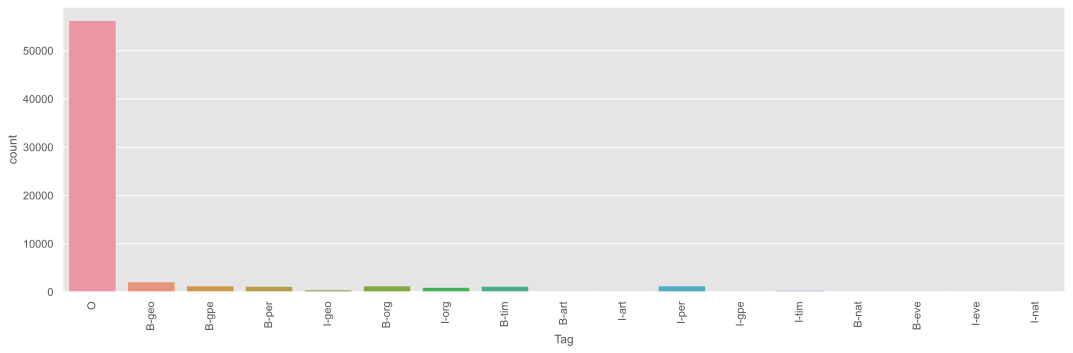

In [22]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


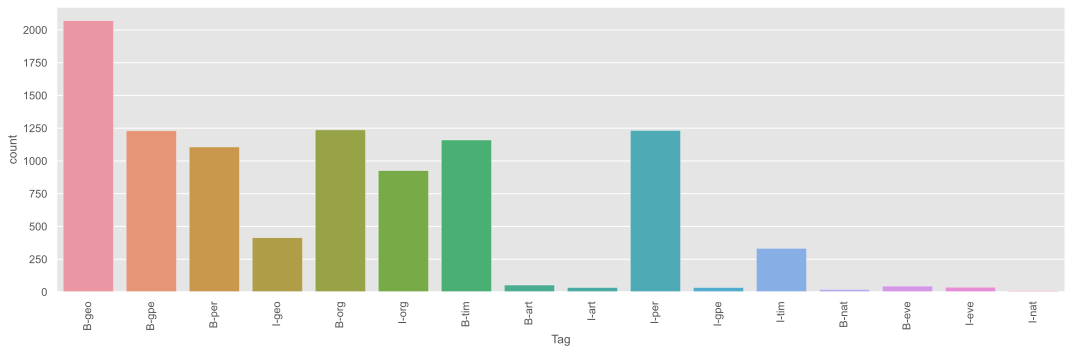

In [23]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=data.loc[data['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


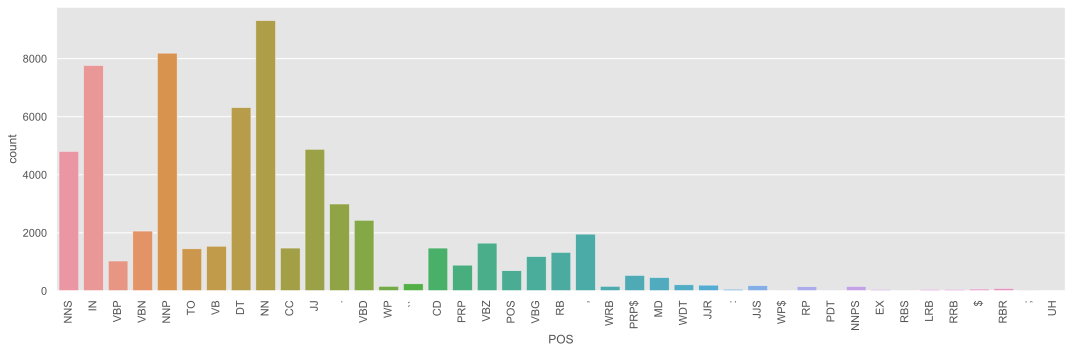

In [24]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('POS', data=data, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [25]:
def feature_map(word):
    return np.array([word.istitle(), word.islower(), word.isupper(), len(word),
                     word.isdigit(),  word.isalpha()])

In [26]:
words = [feature_map(w) for w in data["Word"].values.tolist()]
tags = data["Tag"].values.tolist()

In [27]:
print(words[:5])

[array([1, 0, 0, 9, 0, 1]), array([0, 1, 0, 2, 0, 1]), array([ 0,  1,  0, 13,  0,  1]), array([0, 1, 0, 4, 0, 1]), array([0, 1, 0, 7, 0, 1])]


In [28]:
pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X=words, y=tags, cv=5)

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_pred=pred, y_true=tags)
print(report)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        53
       B-eve       0.00      0.00      0.00        45
       B-geo       0.23      0.72      0.35      2070
       B-gpe       0.17      0.12      0.14      1230
       B-nat       0.00      0.00      0.00        20
       B-org       0.65      0.16      0.25      1237
       B-per       0.98      0.19      0.32      1107
       B-tim       0.28      0.33      0.31      1160
       I-art       0.00      0.00      0.00        34
       I-eve       0.00      0.00      0.00        37
       I-geo       0.00      0.00      0.00       414
       I-gpe       0.00      0.00      0.00        34
       I-nat       0.00      0.00      0.00         9
       I-org       0.29      0.03      0.06       926
       I-per       0.37      0.01      0.03      1234
       I-tim       0.53      0.07      0.13       334
           O       0.97      0.98      0.98     56217

    accuracy              

In [30]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]
#Creating the train and test set
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]
#Creating the CRF model
crf = CRF(algorithm='lbfgs',
          c1=0.1,
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False)
#We predcit using the same 5 fold cross validation
pred = cross_val_predict(estimator=crf, X=X, y=y, cv=5)
#Lets evaluate the mode
report = flat_classification_report(y_pred=pred, y_true=y)
print(report)

NameError: name 'CRF' is not defined

In [ ]:
crf2 = CRF(algorithm='lbfgs',
          c1=10,
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False)

In [ ]:
pred = cross_val_predict(estimator=crf2, X=X, y=y, cv=5)
report = flat_classification_report(y_pred=pred, y_true=y)
print(report)

In [ ]:
crf2.fit(X, y)

In [ ]:
labels = list(crf2.classes_)
labels = list(filter(lambda a: a != 'O', labels))
print(labels)

In [ ]:
crf3 = CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(X, y)

In [ ]:
print('Best parameters:', rs.best_params_)
print('Best CV score:', rs.best_score_)
print('Model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

In [ ]:
sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0]))

In [ ]:
crf3 = rs.best_estimator_
y_pred = crf3.predict(X)
print(metrics.flat_classification_report(
    y, y_pred, labels=sorted_labels, digits=3))

In [ ]:
crf3.fit(X,y)

In [ ]:
eli5.show_weights(crf3, top=30)